# Fault Detection with VAR Models

### Plot the dataset

In [1]:
# Importing packages and libraries
from pandas import read_csv
import pandas as pd
import numpy as np
import pickle
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

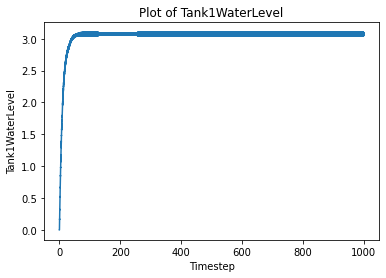

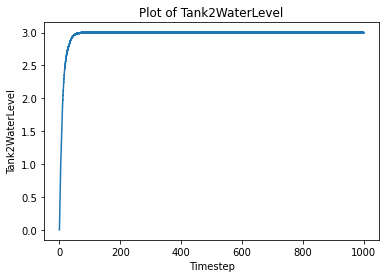

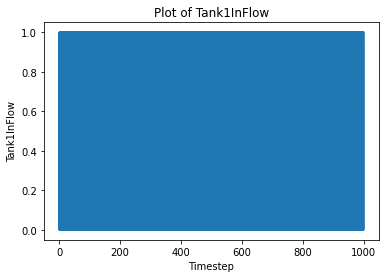

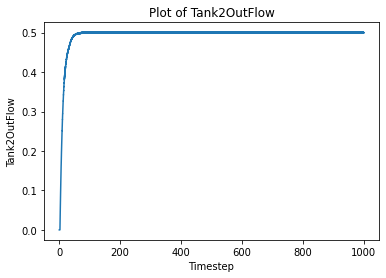

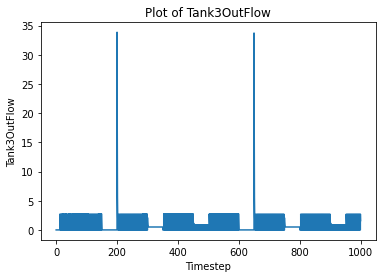

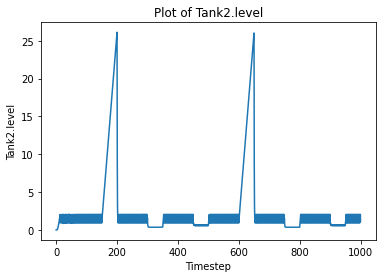

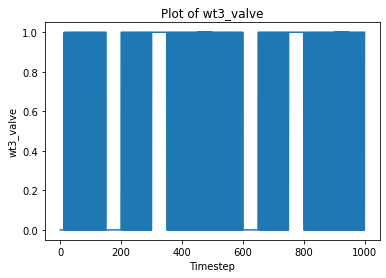

In [2]:

df_raw = read_csv('test_series.csv', header=0, index_col=0)
attr = list(pd.read_csv("test_series.csv").columns.values)[1:]
for i in range(len(attr)):
    title = "Plot of "+str(attr[i])
    actual = df_raw.iloc[:,i]
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel(attr[i])
    plt.plot(actual)
    plt.show()

### Normalisation of the golden dataset
##### This is to obtain the mean and standard deviation that would be used for normalising all the datasets

In [3]:
def normalise_timeseries(data):
    # Calculate the mean and standard deviation for each feature
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    
    # Normalise each feature using standard deviation
    normalised_data = (data - means) / stds
    return pd.DataFrame(normalised_data)



def denormalise_timeseries(data, means, stds):
    denormalised_data = (data * stds) + means
    return pd.DataFrame(denormalised_data)



normalised_data = normalise_timeseries(df_raw)

In [4]:
testData = normalised_data
testData

,Tank1WaterLevel,Tank2WaterLevel,Tank1InFlow,Tank2OutFlow,Tank3OutFlow,Tank2.level,wt3_valve
time,,,,,,,
0.00,-13.751169,-13.647795,-1.001251,-11.718138,-0.399607,-0.564448,-0.699801
0.05,-13.751171,-13.647793,-1.001251,-11.718138,-0.399607,-0.564448,-0.699801
0.10,-13.736104,-13.647793,0.998751,-11.718138,-0.399607,-0.564448,-0.699801
0.15,-13.504895,-13.607095,0.998751,-11.718138,-0.399607,-0.564448,-0.699801
0.20,-13.402350,-13.512143,-1.001251,-11.718138,-0.399607,-0.564448,-0.699801
...,...,...,...,...,...,...,...
999.80,0.165423,0.123577,0.998751,0.126510,1.245761,-0.249446,1.428978
999.85,0.239056,0.140814,0.998751,0.133595,1.179017,-0.262224,1.428978
999.90,0.175745,0.174565,-1.001251,0.169767,1.085672,-0.280094,1.428978


In [5]:
# Train Test Split
nobs = 3000
# train = df[:-nobs]
train = testData.iloc[:-nobs]
test = testData.iloc[-nobs:]
len(train), len(test)

(17001, 3000)

### Load the saved models

In [6]:
# The saved models are loaded to reconstruct the VAR
attr = list(pd.read_csv('waterTank_Golden.csv').columns.values)[1:]
with open('var_golden_model.pkl', 'rb') as f:
    golden_model = pickle.load(f)

with open('var_ctrl_valueFlip.pkl', 'rb') as vf:
    valueFlip_model = pickle.load(vf)    

with open('var_ctrl_stuckat0.pkl', 'rb') as stuck0:
    stuckat0_model = pickle.load(stuck0)    

with open('var_ctrl_stuckat1.pkl', 'rb') as stuck1:
    stuckat1_model = pickle.load(stuck1)



In [9]:

# golden_model = VAR.load('var_golden_model.pkl')

# Retrieve the lag order
lag_order = golden_model.k_ar
# lag_order = 19

# Prepare new data
newData = pd.read_csv('waterTank_Golden.csv', index_col=0, header=0, parse_dates=True)
newData = newData[attr]
newData = newData[-lag_order:]

# Initialise the VAR model
model_input = newData.values
# golden_model.initialize_known(model_input)

# Make predictions
predictions = golden_model.forecast(model_input, steps=5)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=newData.columns)

print(predictions_df)


   Tank1WaterLevel  Tank2WaterLevel  Tank1InFlow  Tank2OutFlow  wt3_valve  \
0         2.838345         3.081146    -4.017566      0.621318  -1.677596   
1         2.769163         3.056213    -2.906923      0.664845  -2.176784   
2         2.912820         2.956518     5.334346      0.656996  -1.974524   
3         3.133432         2.965130     4.410667      0.729756  -2.039053   
4         3.269394         3.133787    -4.982678      0.959885  -1.937637   

   Tank3OutFlow  Tank2.level  
0      0.211573     1.306810  
1     -1.957941     1.548870  
2     -2.516769     1.729245  
3     -1.928225     2.002266  
4     -1.932466     2.091736  


In [10]:
testData

,Tank1WaterLevel,Tank2WaterLevel,Tank1InFlow,Tank2OutFlow,Tank3OutFlow,Tank2.level,wt3_valve
time,,,,,,,
0.00,-13.751169,-13.647795,-1.001251,-11.718138,-0.399607,-0.564448,-0.699801
0.05,-13.751171,-13.647793,-1.001251,-11.718138,-0.399607,-0.564448,-0.699801
0.10,-13.736104,-13.647793,0.998751,-11.718138,-0.399607,-0.564448,-0.699801
0.15,-13.504895,-13.607095,0.998751,-11.718138,-0.399607,-0.564448,-0.699801
0.20,-13.402350,-13.512143,-1.001251,-11.718138,-0.399607,-0.564448,-0.699801
...,...,...,...,...,...,...,...
999.80,0.165423,0.123577,0.998751,0.126510,1.245761,-0.249446,1.428978
999.85,0.239056,0.140814,0.998751,0.133595,1.179017,-0.262224,1.428978
999.90,0.175745,0.174565,-1.001251,0.169767,1.085672,-0.280094,1.428978


In [ ]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
# mydata = read_csv('test_fault.csv', header=0, index_col=0)
mydata = read_csv('no_fault.csv', header=0, index_col=0)
attr = list(pd.read_csv("no_fault.csv").columns.values)[1:]
for i in range(len(attr)):
    title = "Plot of "+str(attr[i])
#     actual = mydata.iloc[:400,i]
    actual = mydata.iloc[:,i]
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel(attr[i])
#     plt.plot(actual, label="original")
    plt.plot(actual)
#     plt.legend()
    plt.show()